<a href="https://colab.research.google.com/github/akiabe/coursera-dl-tf-in-practice/blob/master/C1W2_Kaggle_Dogs_vs_Cats_ImageAugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Download example data
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-06-02 03:52:00--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.13.240, 2607:f8b0:4004:815::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.13.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   124MB/s    in 0.5s    

2020-06-02 03:52:01 (124 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
# Access to the file system and unzip file
import os
import zipfile

# # UnZip to '/tmp' directory
local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
# Define train and validation directory
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Define train cat/dog pictures directory
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Define validation cat/dog pictures directory
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [7]:
# Check filenames in the train directory
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)
validation_cat_fnames = os.listdir(validation_cats_dir)
validation_dog_fnames = os.listdir(validation_dogs_dir)

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])
print(validation_cat_fnames[:10])
print(validation_dog_fnames[:10])

['cat.468.jpg', 'cat.423.jpg', 'cat.573.jpg', 'cat.31.jpg', 'cat.884.jpg', 'cat.676.jpg', 'cat.397.jpg', 'cat.101.jpg', 'cat.298.jpg', 'cat.626.jpg']
['dog.937.jpg', 'dog.437.jpg', 'dog.860.jpg', 'dog.222.jpg', 'dog.69.jpg', 'dog.627.jpg', 'dog.308.jpg', 'dog.804.jpg', 'dog.469.jpg', 'dog.58.jpg']
['cat.2164.jpg', 'cat.2150.jpg', 'cat.2421.jpg', 'cat.2494.jpg', 'cat.2469.jpg', 'cat.2111.jpg', 'cat.2185.jpg', 'cat.2019.jpg', 'cat.2021.jpg', 'cat.2106.jpg']
['dog.2220.jpg', 'dog.2152.jpg', 'dog.2308.jpg', 'dog.2349.jpg', 'dog.2391.jpg', 'dog.2271.jpg', 'dog.2285.jpg', 'dog.2445.jpg', 'dog.2300.jpg', 'dog.2394.jpg']


In [8]:
# Check total file numbers
print('total training cat images: ', len(os.listdir(train_cats_dir)))
print('total training dog images: ', len(os.listdir(train_dogs_dir)))
print('total validation cat images: ', len(os.listdir(validation_cats_dir)))
print('total validation dog images: ', len(os.listdir(validation_dogs_dir)))

total training cat images:  1000
total training dog images:  1000
total validation cat images:  500
total validation dog images:  500


In [0]:
import tensorflow as tf

In [0]:
# Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [0]:
# Optimizer
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data preprocess by normalize the pixel values to be in the [0, 1] range
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

# Flow validation images in batches of 20 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
# Training the model
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/100
100/100 - 17s - loss: 0.6932 - accuracy: 0.5145 - val_loss: 0.6862 - val_accuracy: 0.5000
Epoch 2/100
100/100 - 16s - loss: 0.6824 - accuracy: 0.5605 - val_loss: 0.6868 - val_accuracy: 0.5250
Epoch 3/100
100/100 - 16s - loss: 0.6647 - accuracy: 0.5975 - val_loss: 0.6397 - val_accuracy: 0.6270
Epoch 4/100
100/100 - 16s - loss: 0.6559 - accuracy: 0.6315 - val_loss: 0.6101 - val_accuracy: 0.6720
Epoch 5/100
100/100 - 16s - loss: 0.6386 - accuracy: 0.6210 - val_loss: 0.6041 - val_accuracy: 0.6690
Epoch 6/100
100/100 - 16s - loss: 0.6203 - accuracy: 0.6605 - val_loss: 0.5675 - val_accuracy: 0.7080
Epoch 7/100
100/100 - 16s - loss: 0.6102 - accuracy: 0.6670 - val_loss: 0.5506 - val_accuracy: 0.7140
Epoch 8/100
100/100 - 16s - loss: 0.5960 - accuracy: 0.6820 - val_loss: 0.5667 - val_accuracy: 0.6900
Epoch 9/100
100/100 - 16s - loss: 0.5905 - accuracy: 0.6945 - val_loss: 0.5449 - val_accuracy: 0.7080
Epoch 10/100
100/100 - 16s - loss: 0.5847 - accuracy: 0.6790 - val_loss: 0.5606 - 

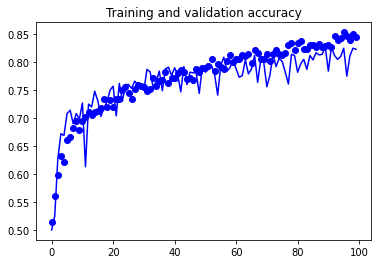

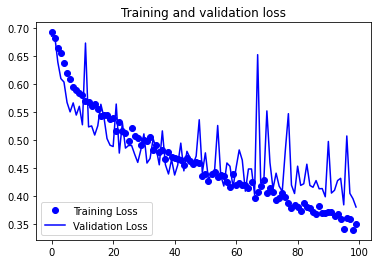

In [15]:
# Plotting accuracy
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
# Clean up
import os, signal

os.kill(     os.getpid() , 
         signal.SIGKILL
       )